In [88]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [54]:
sales_df = pd.read_csv('2023_Ticket_Sales_with_Attendance.csv')
sales_df

/var/folders/23/z3k66lxx0cd1jl6zg3b31qhr0000gn/T/ipykernel_2304/1291652595.py:1: DtypeWarning: Columns (5,9,11,17,18,19,21,22,23,25,26,27,28,30,54,56,57,95,96,97,98,100,101,102,103,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv('2023_Ticket_Sales_with_Attendance.csv')


,FINANCIAL_ACCOUNT_ID,FINANCIAL_ACCOUNT_NAME,FINANCIAL_ACCOUNT_TYPE_CODE,FINANCIAL_FORMATTED_NAME,FINANCIAL_FIRST_NAME,FINANCIAL_MIDDLE_NAME,FINANCIAL_LAST_NAME,FINANCIAL_ADDRESS_TYPE_CODE,FINANCIAL_ADDRESS_1,FINANCIAL_ADDRESS_2,...,ORDER_SALES_REP_LAST_NAME,ORDER_SALES_REP_FORMATTED_NAME,ORDER_SALES_REP_GROUP_CODE,ORDER_SALES_REP_GROUP_DESC,ORDER_SALES_REP_SUBGROUP_CODE,ORDER_SALES_REP_SUBGROUP_DESC,TICKET_FORWARDED,SEAT_ASSIGNMENT_TRANSACTION_ID,SEAT_ASSIGNMENT_TRANSACTION_DATE,ATTENDED
0,1177481.0,"Turner, Andrea",IND,Andrea Turner,Andrea,NaN,Turner,HOME,12 Naumaan lane,NaN,...,Bodreau,Dalton Bodreau,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,1
1,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0
2,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0
3,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0
4,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614264,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
614265,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
614266,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
614267,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0


In [55]:
sales_df['EVENT_USAGE_DATE'] = pd.to_datetime(sales_df['EVENT_USAGE_DATE'], format='%Y-%m-%d %H:%M:%S', utc=True)
sales_df['EVENT_USAGE_DATE'] = sales_df['EVENT_USAGE_DATE'].dt.strftime('%Y-%m-%d')
sales_df = sales_df.drop(sales_df[sales_df['EVENT_USAGE_DATE'] == '2023-12-01'].index)
sales_df

,FINANCIAL_ACCOUNT_ID,FINANCIAL_ACCOUNT_NAME,FINANCIAL_ACCOUNT_TYPE_CODE,FINANCIAL_FORMATTED_NAME,FINANCIAL_FIRST_NAME,FINANCIAL_MIDDLE_NAME,FINANCIAL_LAST_NAME,FINANCIAL_ADDRESS_TYPE_CODE,FINANCIAL_ADDRESS_1,FINANCIAL_ADDRESS_2,...,ORDER_SALES_REP_LAST_NAME,ORDER_SALES_REP_FORMATTED_NAME,ORDER_SALES_REP_GROUP_CODE,ORDER_SALES_REP_GROUP_DESC,ORDER_SALES_REP_SUBGROUP_CODE,ORDER_SALES_REP_SUBGROUP_DESC,TICKET_FORWARDED,SEAT_ASSIGNMENT_TRANSACTION_ID,SEAT_ASSIGNMENT_TRANSACTION_DATE,ATTENDED
0,1177481.0,"Turner, Andrea",IND,Andrea Turner,Andrea,NaN,Turner,HOME,12 Naumaan lane,NaN,...,Bodreau,Dalton Bodreau,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,1
1,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0
2,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0
3,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0
4,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614264,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
614265,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
614266,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
614267,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0


In [56]:
singles_df = sales_df[sales_df['SALE_TYPE_CODE'] == 'S']
singles_df

,FINANCIAL_ACCOUNT_ID,FINANCIAL_ACCOUNT_NAME,FINANCIAL_ACCOUNT_TYPE_CODE,FINANCIAL_FORMATTED_NAME,FINANCIAL_FIRST_NAME,FINANCIAL_MIDDLE_NAME,FINANCIAL_LAST_NAME,FINANCIAL_ADDRESS_TYPE_CODE,FINANCIAL_ADDRESS_1,FINANCIAL_ADDRESS_2,...,ORDER_SALES_REP_LAST_NAME,ORDER_SALES_REP_FORMATTED_NAME,ORDER_SALES_REP_GROUP_CODE,ORDER_SALES_REP_GROUP_DESC,ORDER_SALES_REP_SUBGROUP_CODE,ORDER_SALES_REP_SUBGROUP_DESC,TICKET_FORWARDED,SEAT_ASSIGNMENT_TRANSACTION_ID,SEAT_ASSIGNMENT_TRANSACTION_DATE,ATTENDED
0,1177481.0,"Turner, Andrea",IND,Andrea Turner,Andrea,NaN,Turner,HOME,12 Naumaan lane,NaN,...,Bodreau,Dalton Bodreau,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,1
1,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0
2,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0
3,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0
4,2334753.0,"Dillon, Teresa",IND,Teresa Dillon,Teresa,NaN,Dillon,HOME,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1
269224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1
269225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1
269226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1


In [57]:
singles_attendance_df = singles_df.groupby('EVENT_USAGE_DATE').agg({'ATTENDED' : 'sum','EVENT_USAGE_DATE': 'size'}).rename(columns={'EVENT_USAGE_DATE': 'Singles_Sales_Count', 'ATTENDED' : 'Singles_Attendance_Count'}).reset_index()

singles_attendance_df

,EVENT_USAGE_DATE,Singles_Attendance_Count,Singles_Sales_Count
0,2023-03-31,2880,4571
1,2023-04-01,1792,5319
2,2023-04-02,2779,5703
3,2023-04-11,1104,3909
4,2023-04-12,1193,4025
...,...,...,...
70,2023-09-13,708,9885
71,2023-09-14,1615,8585
72,2023-09-15,3029,6272
73,2023-09-16,2740,5902


In [58]:
groups_df = sales_df[sales_df['SALE_TYPE_CODE'] == 'G']
groups_df

,FINANCIAL_ACCOUNT_ID,FINANCIAL_ACCOUNT_NAME,FINANCIAL_ACCOUNT_TYPE_CODE,FINANCIAL_FORMATTED_NAME,FINANCIAL_FIRST_NAME,FINANCIAL_MIDDLE_NAME,FINANCIAL_LAST_NAME,FINANCIAL_ADDRESS_TYPE_CODE,FINANCIAL_ADDRESS_1,FINANCIAL_ADDRESS_2,...,ORDER_SALES_REP_LAST_NAME,ORDER_SALES_REP_FORMATTED_NAME,ORDER_SALES_REP_GROUP_CODE,ORDER_SALES_REP_GROUP_DESC,ORDER_SALES_REP_SUBGROUP_CODE,ORDER_SALES_REP_SUBGROUP_DESC,TICKET_FORWARDED,SEAT_ASSIGNMENT_TRANSACTION_ID,SEAT_ASSIGNMENT_TRANSACTION_DATE,ATTENDED
485544,1084633.0,WBDC,BUS,Samantha Penzone,Samantha,NaN,Penzone,BUS,89 Shewsbury Street,Suite 300,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1
485545,1084633.0,WBDC,BUS,Samantha Penzone,Samantha,NaN,Penzone,BUS,89 Shewsbury Street,Suite 300,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1
485546,1084633.0,WBDC,BUS,Samantha Penzone,Samantha,NaN,Penzone,BUS,89 Shewsbury Street,Suite 300,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1
485547,1084633.0,WBDC,BUS,Samantha Penzone,Samantha,NaN,Penzone,BUS,89 Shewsbury Street,Suite 300,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1
485548,1084633.0,WBDC,BUS,Samantha Penzone,Samantha,NaN,Penzone,BUS,89 Shewsbury Street,Suite 300,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614264,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
614265,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
614266,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
614267,2620604.0,Clarke Schools for Hearing and Speech,GROUP,Jenny Sophis,Jenny,NaN,Sophis,HOME,1 Whitman Rd,NaN,...,Dutton,Lauren Dutton,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0


In [59]:
groups_attendance_df = groups_df.groupby('EVENT_USAGE_DATE').agg({'ATTENDED' : 'sum','EVENT_USAGE_DATE': 'size'}).rename(columns={'EVENT_USAGE_DATE': 'Groups_Sales_Count', 'ATTENDED' : 'Groups_Attendance_Count'}).reset_index()

groups_attendance_df

,EVENT_USAGE_DATE,Groups_Attendance_Count,Groups_Sales_Count
0,2023-03-31,663,1183
1,2023-04-01,149,371
2,2023-04-02,333,801
3,2023-04-11,246,403
4,2023-04-12,234,342
...,...,...,...
70,2023-09-13,550,1360
71,2023-09-14,1190,1885
72,2023-09-15,1828,2581
73,2023-09-16,1794,2793


In [60]:
packages_df = sales_df[sales_df['SALE_TYPE_CODE'] == 'P']
packages_df

,FINANCIAL_ACCOUNT_ID,FINANCIAL_ACCOUNT_NAME,FINANCIAL_ACCOUNT_TYPE_CODE,FINANCIAL_FORMATTED_NAME,FINANCIAL_FIRST_NAME,FINANCIAL_MIDDLE_NAME,FINANCIAL_LAST_NAME,FINANCIAL_ADDRESS_TYPE_CODE,FINANCIAL_ADDRESS_1,FINANCIAL_ADDRESS_2,...,ORDER_SALES_REP_LAST_NAME,ORDER_SALES_REP_FORMATTED_NAME,ORDER_SALES_REP_GROUP_CODE,ORDER_SALES_REP_GROUP_DESC,ORDER_SALES_REP_SUBGROUP_CODE,ORDER_SALES_REP_SUBGROUP_DESC,TICKET_FORWARDED,SEAT_ASSIGNMENT_TRANSACTION_ID,SEAT_ASSIGNMENT_TRANSACTION_DATE,ATTENDED
269228,1084786.0,"Koza, Douglas",IND,Douglas Koza,Douglas,NaN,Koza,HOME,127 Derby Street,NaN,...,Bodreau,Dalton Bodreau,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,1
269229,1084786.0,"Koza, Douglas",IND,Douglas Koza,Douglas,NaN,Koza,HOME,127 Derby Street,NaN,...,Bodreau,Dalton Bodreau,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,1
269230,1084786.0,"Koza, Douglas",IND,Douglas Koza,Douglas,NaN,Koza,HOME,127 Derby Street,NaN,...,Bodreau,Dalton Bodreau,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,1
269231,1084786.0,"Koza, Douglas",IND,Douglas Koza,Douglas,NaN,Koza,HOME,127 Derby Street,NaN,...,Bodreau,Dalton Bodreau,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,1
269232,1084786.0,"Koza, Douglas",IND,Douglas Koza,Douglas,NaN,Koza,HOME,127 Derby Street,NaN,...,Bodreau,Dalton Bodreau,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485539,1191900.0,Commerce Associates,BUS,Katie Krock,Katie,NaN,Krock,HOME,373 Bridle Path,NaN,...,Cain,Jim Cain,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
485540,1191900.0,Commerce Associates,BUS,Katie Krock,Katie,NaN,Krock,HOME,373 Bridle Path,NaN,...,Cain,Jim Cain,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
485541,1191900.0,Commerce Associates,BUS,Katie Krock,Katie,NaN,Krock,HOME,373 Bridle Path,NaN,...,Cain,Jim Cain,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0
485542,1191900.0,Commerce Associates,BUS,Katie Krock,Katie,NaN,Krock,HOME,373 Bridle Path,NaN,...,Cain,Jim Cain,WORCESTER,Worcester Red Sox,WORCESTER,Worcester Red Sox,N,NaN,NaN,0


In [61]:
packages_attendance_df = packages_df.groupby('EVENT_USAGE_DATE').agg({'ATTENDED' : 'sum','EVENT_USAGE_DATE': 'size'}).rename(columns={'EVENT_USAGE_DATE': 'Packages_Sales_Count', 'ATTENDED' : 'Packages_Attendance_Count'}).reset_index()

packages_attendance_df

,EVENT_USAGE_DATE,Packages_Attendance_Count,Packages_Sales_Count
0,2023-03-31,1950,3258
1,2023-04-01,1008,3089
2,2023-04-02,1412,3035
3,2023-04-11,1116,2856
4,2023-04-12,1130,2967
...,...,...,...
141,2023-09-13,545,3102
142,2023-09-14,1115,2928
143,2023-09-15,1845,3169
144,2023-09-16,1349,2657


In [62]:
final_df = pd.merge(singles_attendance_df, groups_attendance_df, how='inner', on='EVENT_USAGE_DATE')
final_df

,EVENT_USAGE_DATE,Singles_Attendance_Count,Singles_Sales_Count,Groups_Attendance_Count,Groups_Sales_Count
0,2023-03-31,2880,4571,663,1183
1,2023-04-01,1792,5319,149,371
2,2023-04-02,2779,5703,333,801
3,2023-04-11,1104,3909,246,403
4,2023-04-12,1193,4025,234,342
...,...,...,...,...,...
70,2023-09-13,708,9885,550,1360
71,2023-09-14,1615,8585,1190,1885
72,2023-09-15,3029,6272,1828,2581
73,2023-09-16,2740,5902,1794,2793


In [63]:
final_df = pd.merge(final_df, packages_attendance_df, how='inner', on='EVENT_USAGE_DATE')
final_df

,EVENT_USAGE_DATE,Singles_Attendance_Count,Singles_Sales_Count,Groups_Attendance_Count,Groups_Sales_Count,Packages_Attendance_Count,Packages_Sales_Count
0,2023-03-31,2880,4571,663,1183,1950,3258
1,2023-04-01,1792,5319,149,371,1008,3089
2,2023-04-02,2779,5703,333,801,1412,3035
3,2023-04-11,1104,3909,246,403,1116,2856
4,2023-04-12,1193,4025,234,342,1130,2967
...,...,...,...,...,...,...,...
70,2023-09-13,708,9885,550,1360,545,3102
71,2023-09-14,1615,8585,1190,1885,1115,2928
72,2023-09-15,3029,6272,1828,2581,1845,3169
73,2023-09-16,2740,5902,1794,2793,1349,2657


In [64]:
final_df.to_csv('Sales+AttenadanceCounts23.csv')

In [79]:
weather_df = pd.read_csv('23Promotion+weather.csv')
weather_df = weather_df.drop(columns=['Game No', 'Unnamed: 2'])
weather_df['EVENT_USAGE_DATE'] = pd.to_datetime(weather_df['Date'], format='%m/%d/%y', utc=True)
weather_df['EVENT_USAGE_DATE'] = weather_df['EVENT_USAGE_DATE'].dt.strftime('%Y-%m-%d')
weather_df = weather_df.drop(columns=['Date'])
weather_df

,Day of Week,Temp,Weather,Promotion,EVENT_USAGE_DATE
0,Friday,52,Cloudy,Opening Day / UniBank Fireworks,2023-03-31
1,Saturday,61,Partly Cloudy,Kids Opening Weekend / Sunset Catch,2023-04-01
2,Sunday,42,Sunny,Fallon Health Sunday Funday / ¡WEPAS! Day,2023-04-02
3,Tuesday,69,Cloudy,Tacos & Tequila Tuesday,2023-04-11
4,Wednesday,72,Clear,Woof Woof Wednesday,2023-04-12
...,...,...,...,...,...
70,Wednesday,68,Cloudy,Fan Appreciation Week / Woof Woof Wednesdsay /...,2023-09-13
71,Thursday,68,Partly Cloudy,Fan Appreciation Week / WooU Night / Throwback...,2023-09-14
72,Friday,63,Cloudy,Fan Appreciation Week / Pride at the Park / Un...,2023-09-15
73,Saturday,70,Sunny,Fan Appreciation Week / ¡WEPAS! Day / Sunset C...,2023-09-16


In [80]:
final_df = pd.merge(final_df, weather_df, how='inner', on='EVENT_USAGE_DATE')
final_df

,EVENT_USAGE_DATE,Singles_Attendance_Count,Singles_Sales_Count,Groups_Attendance_Count,Groups_Sales_Count,Packages_Attendance_Count,Packages_Sales_Count,Day of Week,Temp,Weather,Promotion
0,2023-03-31,2880,4571,663,1183,1950,3258,Friday,52,Cloudy,Opening Day / UniBank Fireworks
1,2023-04-01,1792,5319,149,371,1008,3089,Saturday,61,Partly Cloudy,Kids Opening Weekend / Sunset Catch
2,2023-04-02,2779,5703,333,801,1412,3035,Sunday,42,Sunny,Fallon Health Sunday Funday / ¡WEPAS! Day
3,2023-04-11,1104,3909,246,403,1116,2856,Tuesday,69,Cloudy,Tacos & Tequila Tuesday
4,2023-04-12,1193,4025,234,342,1130,2967,Wednesday,72,Clear,Woof Woof Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
70,2023-09-13,708,9885,550,1360,545,3102,Wednesday,68,Cloudy,Fan Appreciation Week / Woof Woof Wednesdsay /...
71,2023-09-14,1615,8585,1190,1885,1115,2928,Thursday,68,Partly Cloudy,Fan Appreciation Week / WooU Night / Throwback...
72,2023-09-15,3029,6272,1828,2581,1845,3169,Friday,63,Cloudy,Fan Appreciation Week / Pride at the Park / Un...
73,2023-09-16,2740,5902,1794,2793,1349,2657,Saturday,70,Sunny,Fan Appreciation Week / ¡WEPAS! Day / Sunset C...


In [83]:
conditions = [
    final_df['Day of Week'].isin(['Friday', 'Saturday', 'Sunday']),  # Fridays and Saturdays
]
choices = [1]                     # 3 for Fri/Sat, 2 for Sun

# Use np.select to assign values based on conditions
final_df['Weekend'] = np.select(conditions, choices, default=0)  # 1 for all other days
final_df

,EVENT_USAGE_DATE,Singles_Attendance_Count,Singles_Sales_Count,Groups_Attendance_Count,Groups_Sales_Count,Packages_Attendance_Count,Packages_Sales_Count,Day of Week,Temp,Weather,Promotion,Weekend
0,2023-03-31,2880,4571,663,1183,1950,3258,Friday,52,Cloudy,Opening Day / UniBank Fireworks,1
1,2023-04-01,1792,5319,149,371,1008,3089,Saturday,61,Partly Cloudy,Kids Opening Weekend / Sunset Catch,1
2,2023-04-02,2779,5703,333,801,1412,3035,Sunday,42,Sunny,Fallon Health Sunday Funday / ¡WEPAS! Day,1
3,2023-04-11,1104,3909,246,403,1116,2856,Tuesday,69,Cloudy,Tacos & Tequila Tuesday,0
4,2023-04-12,1193,4025,234,342,1130,2967,Wednesday,72,Clear,Woof Woof Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
70,2023-09-13,708,9885,550,1360,545,3102,Wednesday,68,Cloudy,Fan Appreciation Week / Woof Woof Wednesdsay /...,0
71,2023-09-14,1615,8585,1190,1885,1115,2928,Thursday,68,Partly Cloudy,Fan Appreciation Week / WooU Night / Throwback...,0
72,2023-09-15,3029,6272,1828,2581,1845,3169,Friday,63,Cloudy,Fan Appreciation Week / Pride at the Park / Un...,1
73,2023-09-16,2740,5902,1794,2793,1349,2657,Saturday,70,Sunny,Fan Appreciation Week / ¡WEPAS! Day / Sunset C...,1


In [85]:
def promotion_category(promotion):
    if 'firework' in promotion.lower():
        return 'Fireworks'
    elif 'town' in promotion.lower():
        return 'Town Takeover'
    elif 'autograph' in promotion.lower():
        return 'PlayerExp'
    elif 'bases' in promotion.lower():
        return 'PlayerExp'
    elif 'batting' in promotion.lower():
        return 'PlayerExp'
    elif 'heritage' in promotion.lower():
        return 'Heritage'
    elif len(promotion) == 0:
        return 'None'
    else:
        return 'Promotion'
    

final_df['Promotion_Group'] = final_df['Promotion'].apply(promotion_category)
final_df

,EVENT_USAGE_DATE,Singles_Attendance_Count,Singles_Sales_Count,Groups_Attendance_Count,Groups_Sales_Count,Packages_Attendance_Count,Packages_Sales_Count,Day of Week,Temp,Weather,Promotion,Weekend,Promotion_Group
0,2023-03-31,2880,4571,663,1183,1950,3258,Friday,52,Cloudy,Opening Day / UniBank Fireworks,1,Fireworks
1,2023-04-01,1792,5319,149,371,1008,3089,Saturday,61,Partly Cloudy,Kids Opening Weekend / Sunset Catch,1,Promotion
2,2023-04-02,2779,5703,333,801,1412,3035,Sunday,42,Sunny,Fallon Health Sunday Funday / ¡WEPAS! Day,1,Promotion
3,2023-04-11,1104,3909,246,403,1116,2856,Tuesday,69,Cloudy,Tacos & Tequila Tuesday,0,Promotion
4,2023-04-12,1193,4025,234,342,1130,2967,Wednesday,72,Clear,Woof Woof Wednesday,0,Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2023-09-13,708,9885,550,1360,545,3102,Wednesday,68,Cloudy,Fan Appreciation Week / Woof Woof Wednesdsay /...,0,Promotion
71,2023-09-14,1615,8585,1190,1885,1115,2928,Thursday,68,Partly Cloudy,Fan Appreciation Week / WooU Night / Throwback...,0,Promotion
72,2023-09-15,3029,6272,1828,2581,1845,3169,Friday,63,Cloudy,Fan Appreciation Week / Pride at the Park / Un...,1,Fireworks
73,2023-09-16,2740,5902,1794,2793,1349,2657,Saturday,70,Sunny,Fan Appreciation Week / ¡WEPAS! Day / Sunset C...,1,Promotion


In [90]:
final_df['Sales_Count'] = final_df['Singles_Sales_Count'] + final_df['Groups_Sales_Count'] + final_df['Packages_Sales_Count']
final_df['Attendance_Count'] = final_df['Singles_Attendance_Count'] + final_df['Groups_Attendance_Count'] + final_df['Packages_Attendance_Count']
final_df

,EVENT_USAGE_DATE,Singles_Attendance_Count,Singles_Sales_Count,Groups_Attendance_Count,Groups_Sales_Count,Packages_Attendance_Count,Packages_Sales_Count,Day of Week,Temp,Weather,Promotion,Weekend,Promotion_Group,Sales_Count,Attendance_Count
0,2023-03-31,2880,4571,663,1183,1950,3258,Friday,52,Cloudy,Opening Day / UniBank Fireworks,1,Fireworks,9012,5493
1,2023-04-01,1792,5319,149,371,1008,3089,Saturday,61,Partly Cloudy,Kids Opening Weekend / Sunset Catch,1,Promotion,8779,2949
2,2023-04-02,2779,5703,333,801,1412,3035,Sunday,42,Sunny,Fallon Health Sunday Funday / ¡WEPAS! Day,1,Promotion,9539,4524
3,2023-04-11,1104,3909,246,403,1116,2856,Tuesday,69,Cloudy,Tacos & Tequila Tuesday,0,Promotion,7168,2466
4,2023-04-12,1193,4025,234,342,1130,2967,Wednesday,72,Clear,Woof Woof Wednesday,0,Promotion,7334,2557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2023-09-13,708,9885,550,1360,545,3102,Wednesday,68,Cloudy,Fan Appreciation Week / Woof Woof Wednesdsay /...,0,Promotion,14347,1803
71,2023-09-14,1615,8585,1190,1885,1115,2928,Thursday,68,Partly Cloudy,Fan Appreciation Week / WooU Night / Throwback...,0,Promotion,13398,3920
72,2023-09-15,3029,6272,1828,2581,1845,3169,Friday,63,Cloudy,Fan Appreciation Week / Pride at the Park / Un...,1,Fireworks,12022,6702
73,2023-09-16,2740,5902,1794,2793,1349,2657,Saturday,70,Sunny,Fan Appreciation Week / ¡WEPAS! Day / Sunset C...,1,Promotion,11352,5883


In [91]:
filtered_df = final_df[~(final_df['Weather'] == 'Rain - Postponed')]
filtered_df

,EVENT_USAGE_DATE,Singles_Attendance_Count,Singles_Sales_Count,Groups_Attendance_Count,Groups_Sales_Count,Packages_Attendance_Count,Packages_Sales_Count,Day of Week,Temp,Weather,Promotion,Weekend,Promotion_Group,Sales_Count,Attendance_Count
0,2023-03-31,2880,4571,663,1183,1950,3258,Friday,52,Cloudy,Opening Day / UniBank Fireworks,1,Fireworks,9012,5493
1,2023-04-01,1792,5319,149,371,1008,3089,Saturday,61,Partly Cloudy,Kids Opening Weekend / Sunset Catch,1,Promotion,8779,2949
2,2023-04-02,2779,5703,333,801,1412,3035,Sunday,42,Sunny,Fallon Health Sunday Funday / ¡WEPAS! Day,1,Promotion,9539,4524
3,2023-04-11,1104,3909,246,403,1116,2856,Tuesday,69,Cloudy,Tacos & Tequila Tuesday,0,Promotion,7168,2466
4,2023-04-12,1193,4025,234,342,1130,2967,Wednesday,72,Clear,Woof Woof Wednesday,0,Promotion,7334,2557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2023-09-13,708,9885,550,1360,545,3102,Wednesday,68,Cloudy,Fan Appreciation Week / Woof Woof Wednesdsay /...,0,Promotion,14347,1803
71,2023-09-14,1615,8585,1190,1885,1115,2928,Thursday,68,Partly Cloudy,Fan Appreciation Week / WooU Night / Throwback...,0,Promotion,13398,3920
72,2023-09-15,3029,6272,1828,2581,1845,3169,Friday,63,Cloudy,Fan Appreciation Week / Pride at the Park / Un...,1,Fireworks,12022,6702
73,2023-09-16,2740,5902,1794,2793,1349,2657,Saturday,70,Sunny,Fan Appreciation Week / ¡WEPAS! Day / Sunset C...,1,Promotion,11352,5883


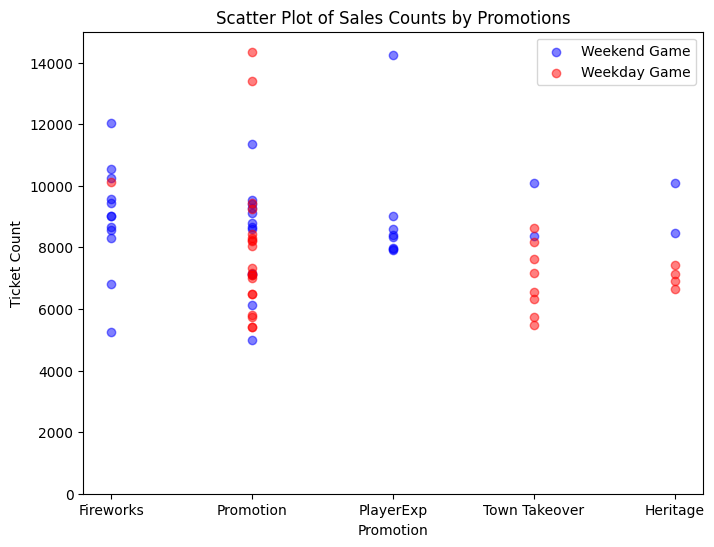

In [93]:
weekend_df = filtered_df[filtered_df['Weekend'] == 1]
weekday_df = filtered_df[filtered_df['Weekend'] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(weekend_df['Promotion_Group'], weekend_df['Sales_Count'], color='blue', alpha=0.5, label='Weekend Game')
plt.scatter(weekday_df['Promotion_Group'], weekday_df['Sales_Count'], color='red', alpha=0.5, label='Weekday Game')
#plt.scatter(filtered_df['Promotion_Group'], filtered_df['Sales_Count'], color='green', alpha=0.5, label='Sales Counts')


# Labels and title
plt.xlabel('Promotion')
plt.ylabel('Ticket Count')
plt.ylim(0, 15000)
plt.title('Scatter Plot of Sales Counts by Promotions')
plt.legend()
plt.show()

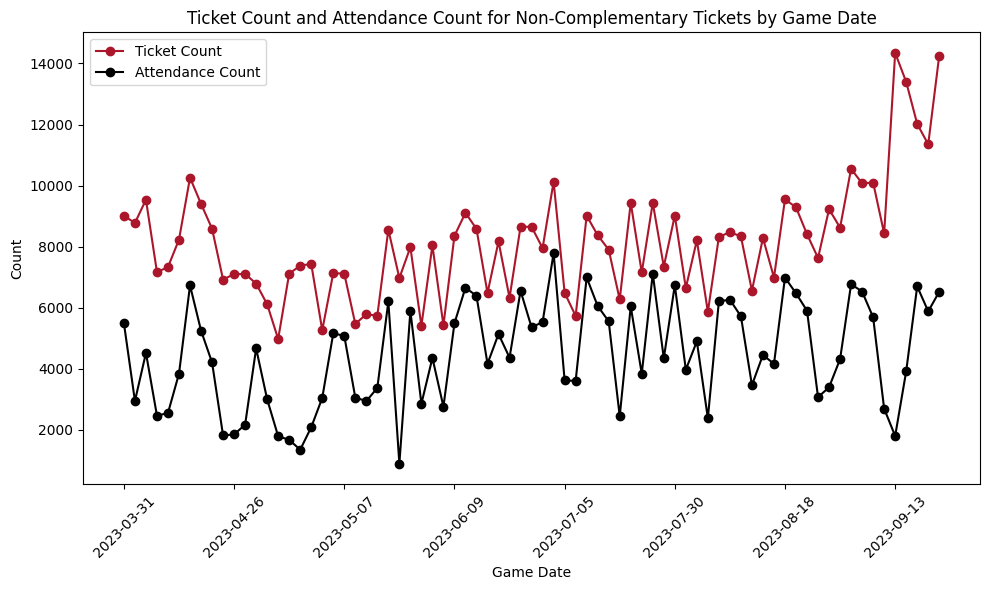

In [95]:
#Plot Attendance and Sales tickets together
plt.figure(figsize=(10, 6))
plt.plot(final_df['EVENT_USAGE_DATE'], final_df['Sales_Count'], color='#ab162b', label='Ticket Count', marker='o')
plt.plot(final_df['EVENT_USAGE_DATE'], final_df['Attendance_Count'],  color='#000000', label='Attendance Count', marker='o')

# Adding labels and title
plt.xlabel('Game Date')
plt.ylabel('Count')
plt.title('Ticket Count and Attendance Count for Non-Complementary Tickets by Game Date')
plt.legend(['Ticket Count', 'Attendance Count'])

# Display the plot
plt.xticks(ticks=final_df['EVENT_USAGE_DATE'][::10], rotation=45)
plt.tight_layout()
plt.show()

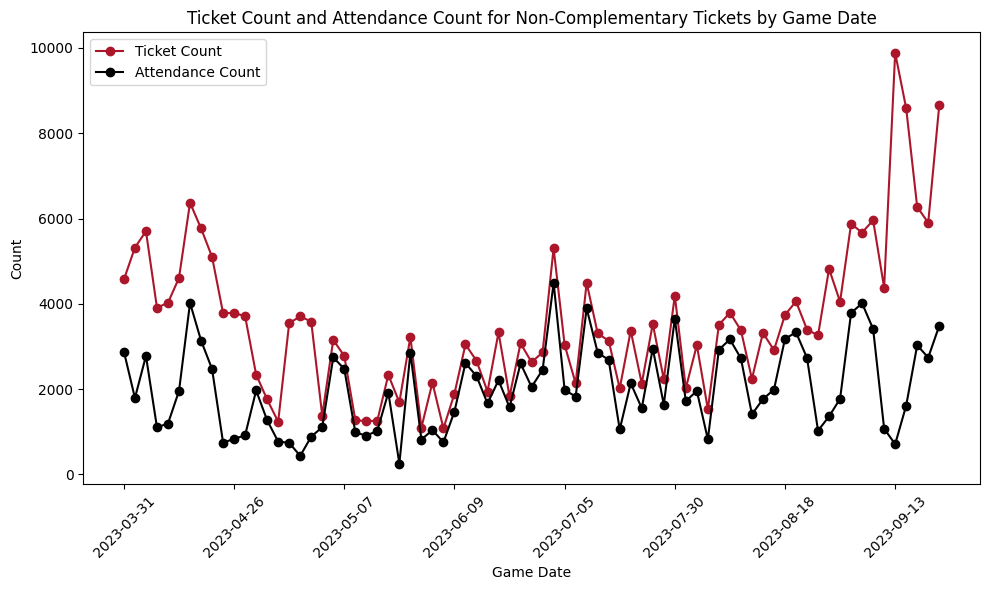

In [96]:
#Plot Attendance and Sales tickets together
plt.figure(figsize=(10, 6))
plt.plot(final_df['EVENT_USAGE_DATE'], final_df['Singles_Sales_Count'], color='#ab162b', label='Ticket Count', marker='o')
plt.plot(final_df['EVENT_USAGE_DATE'], final_df['Singles_Attendance_Count'],  color='#000000', label='Attendance Count', marker='o')

# Adding labels and title
plt.xlabel('Game Date')
plt.ylabel('Count')
plt.title('Ticket Count and Attendance Count for Non-Complementary Tickets by Game Date')
plt.legend(['Ticket Count', 'Attendance Count'])

# Display the plot
plt.xticks(ticks=final_df['EVENT_USAGE_DATE'][::10], rotation=45)
plt.tight_layout()
plt.show()

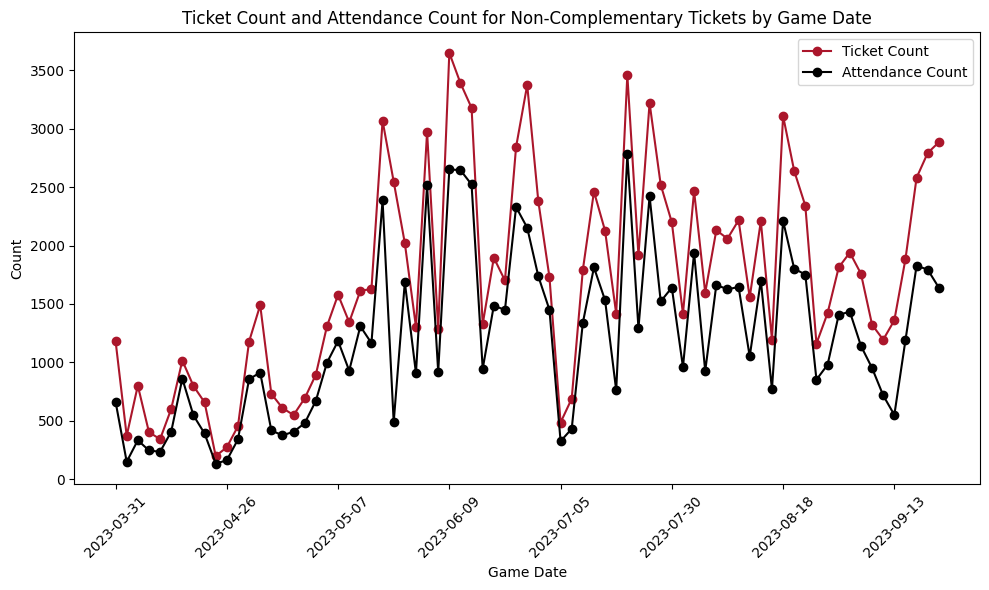

In [97]:
#Plot Attendance and Sales tickets together
plt.figure(figsize=(10, 6))
plt.plot(final_df['EVENT_USAGE_DATE'], final_df['Groups_Sales_Count'], color='#ab162b', label='Ticket Count', marker='o')
plt.plot(final_df['EVENT_USAGE_DATE'], final_df['Groups_Attendance_Count'],  color='#000000', label='Attendance Count', marker='o')

# Adding labels and title
plt.xlabel('Game Date')
plt.ylabel('Count')
plt.title('Ticket Count and Attendance Count for Non-Complementary Tickets by Game Date')
plt.legend(['Ticket Count', 'Attendance Count'])

# Display the plot
plt.xticks(ticks=final_df['EVENT_USAGE_DATE'][::10], rotation=45)
plt.tight_layout()
plt.show()

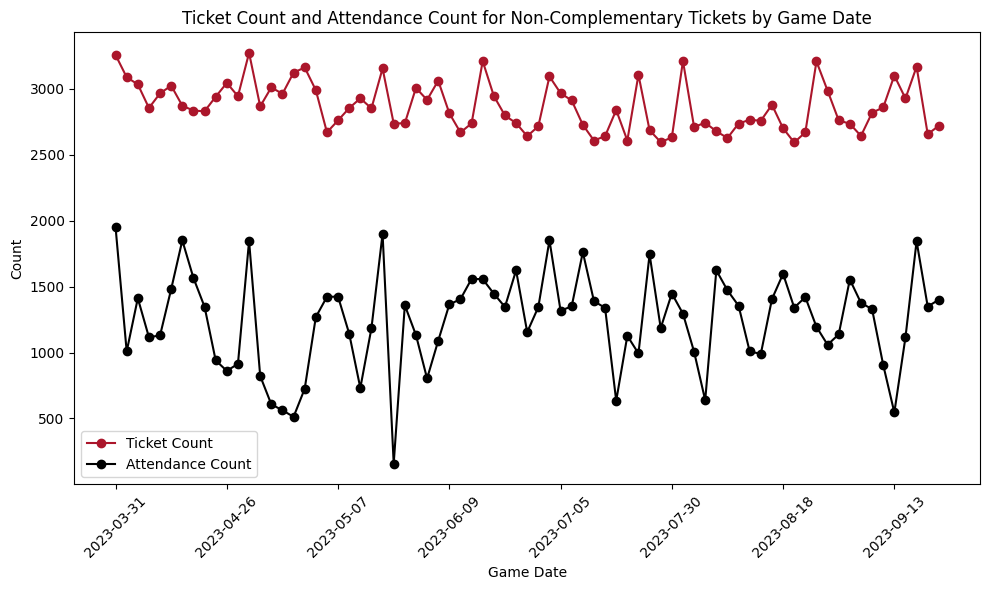

In [98]:
#Plot Attendance and Sales tickets together
plt.figure(figsize=(10, 6))
plt.plot(final_df['EVENT_USAGE_DATE'], final_df['Packages_Sales_Count'], color='#ab162b', label='Ticket Count', marker='o')
plt.plot(final_df['EVENT_USAGE_DATE'], final_df['Packages_Attendance_Count'],  color='#000000', label='Attendance Count', marker='o')

# Adding labels and title
plt.xlabel('Game Date')
plt.ylabel('Count')
plt.title('Ticket Count and Attendance Count for Non-Complementary Tickets by Game Date')
plt.legend(['Ticket Count', 'Attendance Count'])

# Display the plot
plt.xticks(ticks=final_df['EVENT_USAGE_DATE'][::10], rotation=45)
plt.tight_layout()
plt.show()